<a href="https://colab.research.google.com/github/parthdt/B.Tech-Codes/blob/master/Machine%20Learning/Assignment%206/CSP774_Assignment6_Parth_2017UCS0047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6

## Importing libraries and data

In [ ]:
import tensorflow as tf
import numpy as np
import numpy as np
import pandas as pd
import cv2
import os
import sys
import math
import time
from sklearn.metrics import confusion_matrix
from sklearn import svm
from tensorflow import keras

**After importing the required libraries above, the MNIST Dataset is imported.**

In [ ]:
mnist_data  = tf.keras.datasets.mnist
( x_train , y_train ), ( x_test , y_test ) = mnist_data.load_data()

**Installing previous version of opencv to prevent mismatch of function name resulting in errors.**

In [ ]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

## Main code

**Here, three functions are defined to extract the data and use SIFT features, train the SVM Kernel and to test the model trained using SIFT features.**

In [ ]:
def extract_data(x_train,y_train,thresh):
    
    X_Train=[]
    y_Train=[]
    for i in range(0,x_train.shape[0]):
        
        sift = cv2.xfeatures2d.SIFT_create()      
        kp, des = sift.detectAndCompute(x_train[i], None)

        ndes = 0
        if type(des)!=type(None) :
            for d in des:
                if ndes >= thresh:
                    break 
                else:
                    X_Train.append(d.astype(float))
                    y_Train.append(y_train[i])
                    ndes += 1

    return X_Train, y_Train

def train_model(X_Train,y_Train):
    clf = svm.SVC(kernel = 'poly', C = 10, gamma =0.0001,degree=10)
    clf.fit(X_Train[80000:85000,:], y_Train[80000:85000])
    return clf
    
def test_model(clf,x_test,y_test):
    sift = cv2.xfeatures2d.SIFT_create()
    accuracy = 0
    y_predicted = []
    y_actual = []
    for i in range(0,x_test.shape[0]):
        
        kp, des = sift.detectAndCompute(x_test[i], None)
        
        if type(des)!=type(None):
            temp = clf.predict(des)
            pred = temp.astype(np.int64)           
            counts = np.bincount(pred)
            pred_label = np.argmax(counts)
            y_predicted.append(pred_label)
            y_actual.append(y_test[i])
            actual_label = y_test[i]
            if actual_label == pred_label:
                accuracy +=1
    return accuracy,y_predicted,y_actual   


**Now, we use threshold values in multiples of 4, from 4 -> 36 and use the above functions to extract the data, train and test the model for these threshold values.**

In [ ]:

Thresholds = [ multiple*4 for multiple in range(1,10) ]
Accuracy = []
Time =[]
CM =[]
for index in range(0,len(Thresholds)):
    start = time.time()
    print("Threshold = ",Thresholds[i])
    
    X_Train,y_Train = extract_data(x_train,y_train,Thresholds[i])
    X_Train = np.array(X_Train)
    y_Train = np.array(y_Train)
    
    model = train_model(X_Train,y_Train)
    
    accuracy,y_pred,y_act = test_model(clf,x_test,y_test) 
    accuracy_percentage = (accuracy / len(y_act)) * 100
    
    Accuracy.append(accuracy_percentage)
    Time.append(time.time()-start)
    cm = confusion_matrix(y_act,y_pred)
    CM.append(cm)

Threshold =  4
Threshold =  8
Threshold =  12
Threshold =  16
Threshold =  20
Threshold =  24
Threshold =  28
Threshold =  32
Threshold =  36


**Finally, we plot the obtained values of Accuracy and Time taken vs Threshold values.**

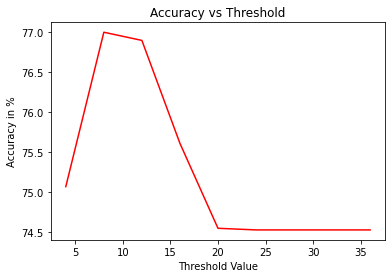

<Figure size 432x288 with 0 Axes>

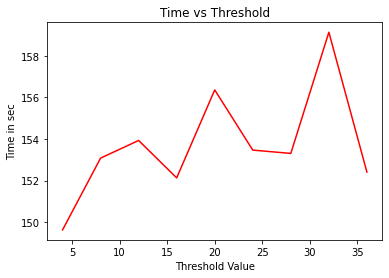

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot  ( Thresholds, Accuracy, color='r')
plt.ylabel('Accuracy in %')
plt.xlabel('Threshold Value')
plt.title ('Accuracy vs Threshold')
plt.show()

plt.plot ( Thresholds, Time, color='r')
plt.ylabel('Time in sec')
plt.xlabel('Threshold Value')
plt.title ('Time vs Threshold')
plt.figure()